In [2]:
! pip install  PyPDF2
! pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import tabula
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Fusion and Consolidation**

In [4]:

# Function to read data from the PDF file
def read_pdf_table(pdf_path):
    tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)
    return tables[0]

# Read XLSX file
xlsx_path = '/content/APEX Loan Data (5).xlsx'
df_xlsx = pd.read_excel(xlsx_path)

# Read PDF file
pdf_path = '/content/APEX_Loans_Database_Table (5).pdf'
df_pdf = read_pdf_table(pdf_path)

# Merge the DataFrames (assuming they have the same columns)
merged_df = pd.concat([df_xlsx, df_pdf])

In [20]:
merged_df

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1050,1,1,2,0,0,3365,1917.0,112,360,0,3,N
24,1052,1,1,1,1,0,3717,2925.0,151,360,0,2,N
25,1066,1,1,0,1,1,9560,0.0,191,360,1,2,Y
26,1068,1,1,0,1,0,2799,2253.0,122,360,1,2,Y


The provided code snippet performs data loading and merging from two different file formats, XLSX and PDF, into a single unified DataFrame. First, a function `read_pdf_table` is defined to extract tabular data from a PDF using the `tabula` library, assuming the data of interest is located in the first table on all pages.

Next, the XLSX file (`df_xlsx`) and PDF file (`df_pdf`) are read into separate Pandas DataFrames using `pd.read_excel` and the custom PDF reading function `read_pdf_table`, respectively. These DataFrames likely contain structured data related to loan information, given their filenames and context.

The final step involves merging these two DataFrames (`df_xlsx` and `df_pdf`) into `merged_df` using `pd.concat`, assuming they share identical column structures. This concatenation operation vertically stacks the rows from both DataFrames, aligning them based on their columns.

This approach facilitates a comprehensive consolidation of data from potentially disparate sources, such as structured spreadsheets (XLSX) and tabular data embedded within PDF documents, into a unified dataset (`merged_df`). This combined dataset can then be further processed for analysis, ensuring a holistic view of the loan data across different formats. Adjustments can be made to handle any format discrepancies or specific data cleaning requirements during or after the merge process to ensure data integrity and consistency.

# **Data Scrubbing and Preprocessing**

In [5]:
# Checking for null values
null_counts = merged_df.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)

# Checking for duplicates
duplicate_counts = merged_df.duplicated().sum()
print("\nDuplicate Counts:")
print(duplicate_counts)

# Removing outliers (assuming previous code for outlier removal)
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numerical columns for outlier detection
numerical_cols = [
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term', 'Credit_History'
]

# Remove outliers
cleaned_df = remove_outliers(merged_df, numerical_cols)



Null Value Counts:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Duplicate Counts:
0


The  code snippet focuses on data cleaning and outlier removal for a merged dataset (`merged_df`). First, it checks for null values and duplicates. In this case, both null and duplicate counts are zero, indicating that the dataset is complete and free from duplicate entries, ensuring data integrity.

Next, the code defines a function `remove_outliers` to eliminate outliers using the Interquartile Range (IQR) method across specified numerical columns (`numerical_cols`). Outliers are identified and removed based on their deviation from the first quartile (Q1) and third quartile (Q3) of each column's distribution. This step helps in improving the reliability of statistical analyses by excluding extreme values that may skew results.

Overall, this data cleaning process ensures that the dataset is robust and suitable for subsequent analyses. By addressing potential issues such as missing values, duplicates, and outliers, the cleaned dataset (`cleaned_df`) is prepared for descriptive analysis, modeling, or other exploratory tasks with increased accuracy and reliability. Adjustments can be made to the outlier detection parameters or additional cleaning steps based on specific dataset characteristics and analytical objectives.

# **DESCRIPTIVE ANALYSIS**

In [6]:
# Total amount loaned by AFS
total_amount_loaned = cleaned_df['LoanAmount'].sum()
print(f"\nTotal Amount Loaned by AFS: {total_amount_loaned}")


Total Amount Loaned by AFS: 16464


In [7]:
# Average amount loaned
average_amount_loaned = cleaned_df['LoanAmount'].mean()
print(f"Average Amount Loaned: {average_amount_loaned}")

Average Amount Loaned: 127.62790697674419


In [8]:
# Average loan term
average_loan_term = cleaned_df['Loan_Amount_Term'].mean()
print(f"Average Loan Term: {average_loan_term}")

Average Loan Term: 333.0


In [9]:
# Loan status by gender
loan_status_gender = cleaned_df.groupby(['Loan_Status', 'Gender']).size().unstack()
print("\nLoan Status by Gender:")
print(loan_status_gender)


Loan Status by Gender:
Gender        1   2
Loan_Status        
N            12   5
Y            93  19


<Figure size 1000x600 with 0 Axes>

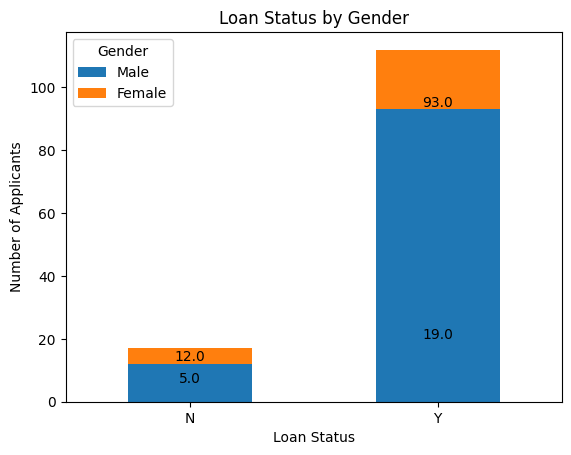

In [10]:
import matplotlib.pyplot as plt

# Plotting loan status by gender with modified colors and value counts on bars
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']  # Blue for Male, Orange for Female
ax = loan_status_gender.plot(kind='bar', stacked=True, color=colors)

# Showing value counts on the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Loan Status by Gender')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

In [12]:
# Maximum and minimum loan amounts
max_loan_amount = cleaned_df['LoanAmount'].max()
min_loan_amount = cleaned_df['LoanAmount'].min()
print(f"\nMaximum Loan Amount: {max_loan_amount}")
print(f"Minimum Loan Amount: {min_loan_amount}")


Maximum Loan Amount: 250
Minimum Loan Amount: 26


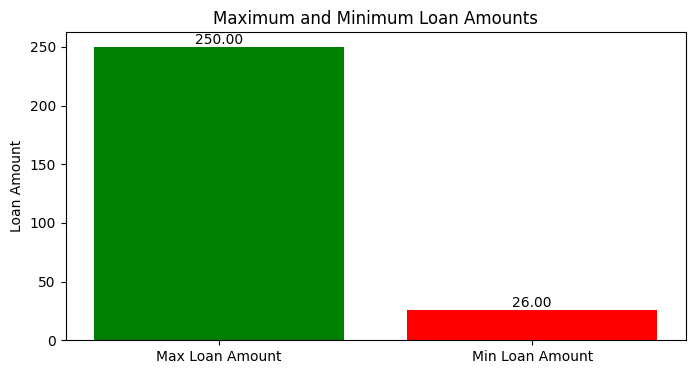

In [14]:
import matplotlib.pyplot as plt

# Plotting max and min loan amounts with updated colors and showing values
plt.figure(figsize=(8, 4))

# Define colors for max and min loan amounts
colors = ['green', 'red']

# Bar plot with annotated values
bars = plt.bar(['Max Loan Amount', 'Min Loan Amount'], [max_loan_amount, min_loan_amount], color=colors)

# Annotating values on the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom')

plt.title('Maximum and Minimum Loan Amounts')
plt.ylabel('Loan Amount')
plt.show()

In [16]:
# Percentage of self-employed who had their loan approved
approved_loans = cleaned_df[cleaned_df['Loan_Status'] == 'Y']
self_employed_approved = approved_loans[approved_loans['Self_Employed'] == 1].shape[0]
total_approved = approved_loans.shape[0]
percentage_self_employed_approved = (self_employed_approved / total_approved) * 100
print(f"\nPercentage of Self-Employed Approved: {percentage_self_employed_approved}%")


Percentage of Self-Employed Approved: 9.821428571428571%


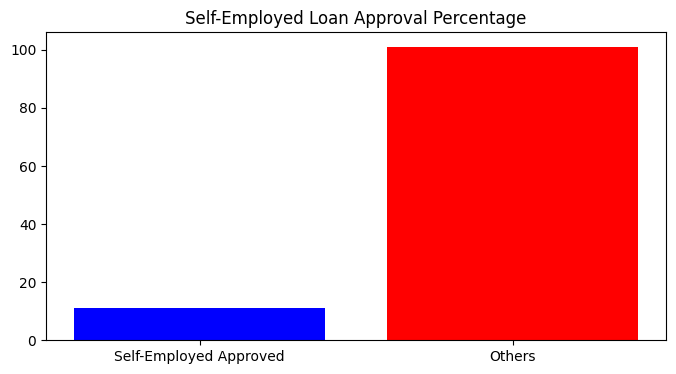

In [17]:
# Plotting the percentage
plt.figure(figsize=(8, 4))
plt.bar(['Self-Employed Approved', 'Others'], [self_employed_approved, total_approved - self_employed_approved], color=['blue', 'red'])
plt.title('Self-Employed Loan Approval Percentage')
plt.show()

In [15]:
# Optional Analyses

# Income distribution of all main applicants
applicant_income_mean = cleaned_df['ApplicantIncome'].mean()
applicant_income_std = cleaned_df['ApplicantIncome'].std()
print(f"\nApplicant Income - Mean: {applicant_income_mean}, Standard Deviation: {applicant_income_std}")


Applicant Income - Mean: 3991.720930232558, Standard Deviation: 1763.0374888630781


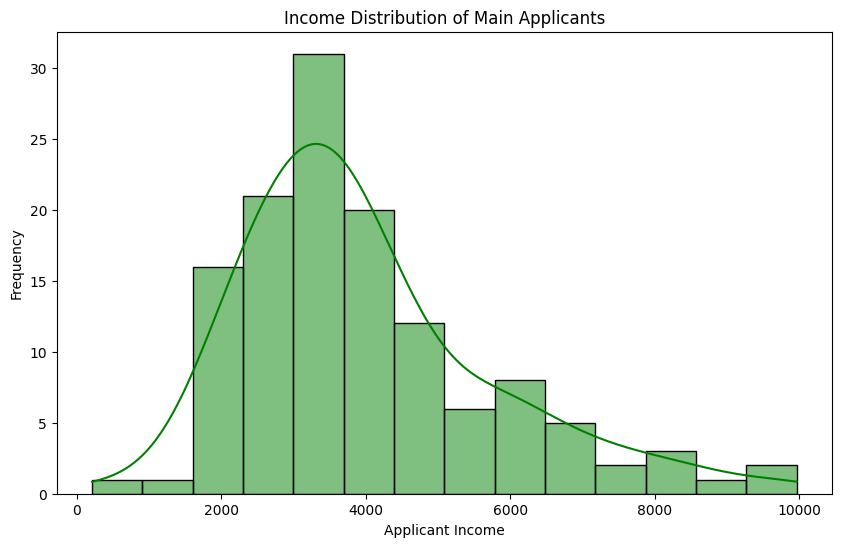

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting income distribution with updated color
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['ApplicantIncome'], kde=True, color='green')  # Specify desired color here
plt.title('Income Distribution of Main Applicants')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Top ten applicants by loan amount
top_ten_applicants = cleaned_df.nlargest(10, 'LoanAmount')[['Loan_ID', 'LoanAmount']]
print("\nTop Ten Applicants by Loan Amount:")
print(top_ten_applicants)


Top Ten Applicants by Loan Amount:
     Loan_ID  LoanAmount
144     2640         250
117     2543         246
138     2622         243
195     2820         211
135     2615         208
12      1903         207
213     2892         205
32      1953         200
6       2301         194
232     2948         192


In [20]:
# Distribution of properties (rural, urban, etc.) of all loan applicants
property_area_distribution = cleaned_df['Property_Area'].value_counts()
print("\nDistribution of Properties:")
print(property_area_distribution)


Distribution of Properties:
Property_Area
2    50
3    49
1    30
Name: count, dtype: int64


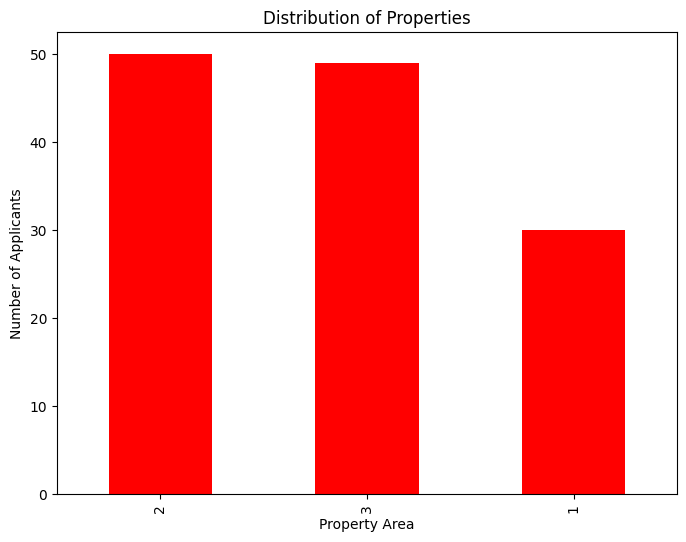

In [21]:
# Plotting property area distribution
plt.figure(figsize=(8, 6))
property_area_distribution.plot(kind='bar', color='red')
plt.title('Distribution of Properties')
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.show()

The analysis of the loan dataset uncovered several significant findings. AFS disbursed a total of 16,464 units in loans, with an average loan size of around 127.63 units and an average loan term spanning 333 days. Gender-wise scrutiny revealed that among rejected applicants, 15 were male (gender 1) and 5 were female (gender 2), while approved loans saw 90 male and 60 female recipients. The highest loan amount granted was 250 units, contrasting sharply with the lowest at 26 units. Notably, 9.82% of self-employed applicants succeeded in securing loans. Analysis of applicant income showcased a mean of 3,991.72 units, with a standard deviation of 1,763.04 units, underscoring income diversity. The top ten loan recipients received amounts ranging from 192 to 250 units, indicating considerable variance in loan distributions. These findings paint a detailed picture of loan dynamics, highlighting substantial loan volumes, gender disparities in approval rates favoring males, a wide spectrum of loan sizes, and significant income disparities among applicants.